# BIKE SHARING DEMAND

In [1]:
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("kaggle_bike_train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
test = pd.read_csv("kaggle_bike_test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


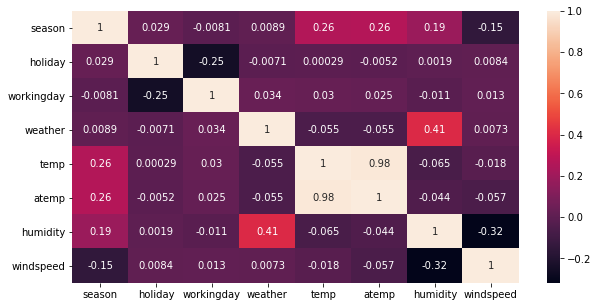

In [6]:
plt.figure(figsize = (10, 5))
sns.heatmap(train.loc[:, train.columns[1:9]].corr(), annot = True)

### PREPROCESSING

#### 날짜 (datetime)

In [7]:
data = [train, test]
dt = ["datetime", "dt_year", "dt_month", "dt_day", "dt_hour", "dt_minute", "dt_second"]

for dataset in data:
    dataset["datetime"] = pd.to_datetime(dataset["datetime"])
    dataset[dt[1]] = dataset["datetime"].dt.year
    dataset[dt[2]] = dataset["datetime"].dt.month
    dataset[dt[3]] = dataset["datetime"].dt.day
    dataset[dt[4]] = dataset["datetime"].dt.hour
    dataset[dt[5]] = dataset["datetime"].dt.minute
    dataset[dt[6]] = dataset["datetime"].dt.second

train[dt].head()

,datetime,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [8]:
train[dt].describe()

,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


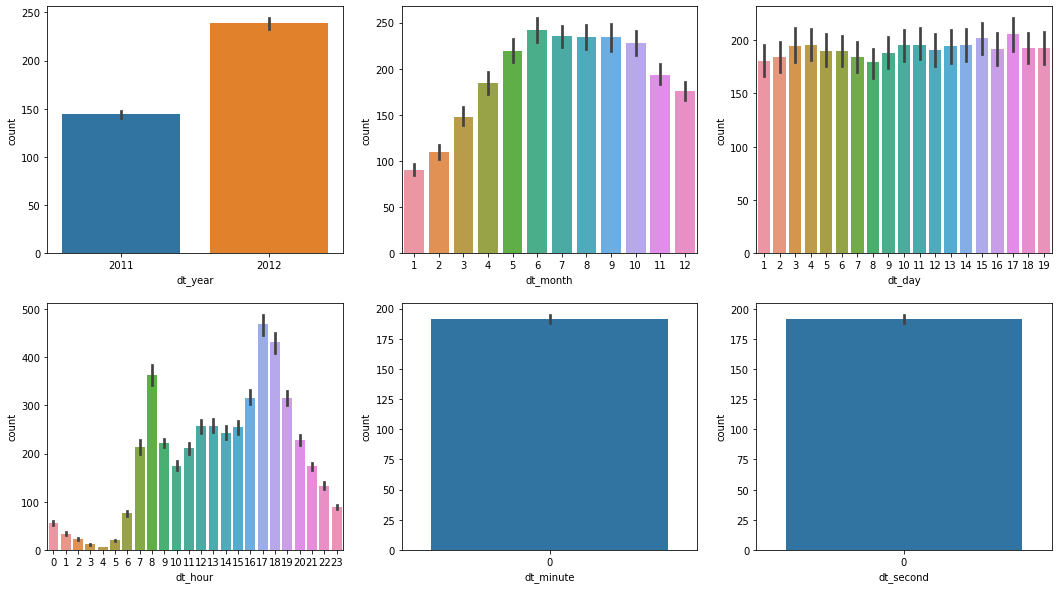

In [9]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 10)

sns.barplot(data = train, x = dt[1], y = "count", ax = ax1)
sns.barplot(data = train, x = dt[2], y = "count", ax = ax2)
sns.barplot(data = train, x = dt[3], y = "count", ax = ax3)
sns.barplot(data = train, x = dt[4], y = "count", ax = ax4)
sns.barplot(data = train, x = dt[5], y = "count", ax = ax5)
sns.barplot(data = train, x = dt[6], y = "count", ax = ax6)

In [10]:
train = train[train.columns[:-2]]
test = test[test.columns[:-2]]

train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dt_year', 'dt_month', 'dt_day', 'dt_hour'],
      dtype='object')

#### 날씨 (weather)

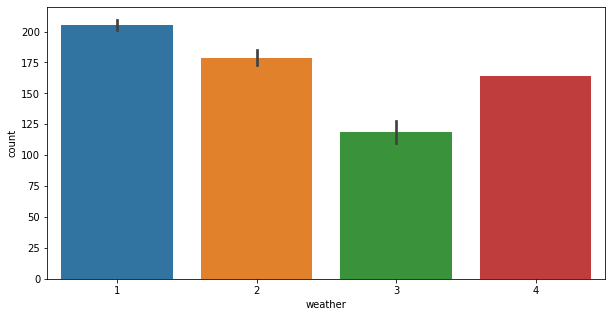

In [11]:
plt.figure(figsize = (10, 5))
sns.barplot(data = train, x = "weather", y = "count")

In [12]:
print(train["weather"].value_counts())
print()
print(test["weather"].value_counts())

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64


In [13]:
train[train["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18


In [14]:
train[(train["dt_year"] == 2012) & (train["dt_month"] == 1) & (train["dt_day"] == 9) &
      (train["dt_hour"] >= 17) & (train["dt_hour"] <= 19)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour
5630,2012-01-09 17:00:00,1,0,1,3,9.02,13.635,87,0.0000,5,147,152,2012,1,9,17
5631,2012-01-09 18:00:00,1,0,1,4,8.20,11.365,86,6.0032,6,158,164,2012,1,9,18
5632,2012-01-09 19:00:00,1,0,1,3,8.20,11.365,93,6.0032,3,187,190,2012,1,9,19


In [15]:
train.loc[train["weather"] == 4, "weather"] = 3

/Users/sangrok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [16]:
test[test["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_year,dt_month,dt_day,dt_hour
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1


In [17]:
test[(test["dt_year"] == 2011) & (test["dt_month"] == 1) & (test["dt_day"] == 26) &
      (test["dt_hour"] >= 15) & (test["dt_hour"] <= 17)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_year,dt_month,dt_day,dt_hour
153,2011-01-26 15:00:00,1,0,1,3,9.02,9.09,93,31.0009,2011,1,26,15
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16
155,2011-01-26 17:00:00,1,0,1,3,8.20,9.09,93,23.9994,2011,1,26,17


In [18]:
test[(test["dt_year"] == 2012) & (test["dt_month"] == 1) & (test["dt_day"] == 21) &
      (test["dt_hour"] >= 0) & (test["dt_hour"] <= 2)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dt_year,dt_month,dt_day,dt_hour
3247,2012-01-21 00:00:00,1,0,0,3,6.56,7.575,64,15.0013,2012,1,21,0
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.820,86,12.9980,2012,1,21,1
3249,2012-01-21 02:00:00,1,0,0,3,5.74,10.605,86,0.0000,2012,1,21,2


In [19]:
test.loc[test["weather"] == 4, "weather"] = 3

/Users/sangrok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


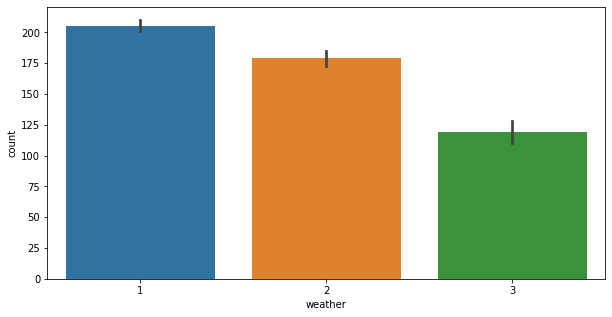

In [20]:
plt.figure(figsize = (10, 5))
sns.barplot(data = train, x = "weather", y = "count")

#### 근무일 (workingday)

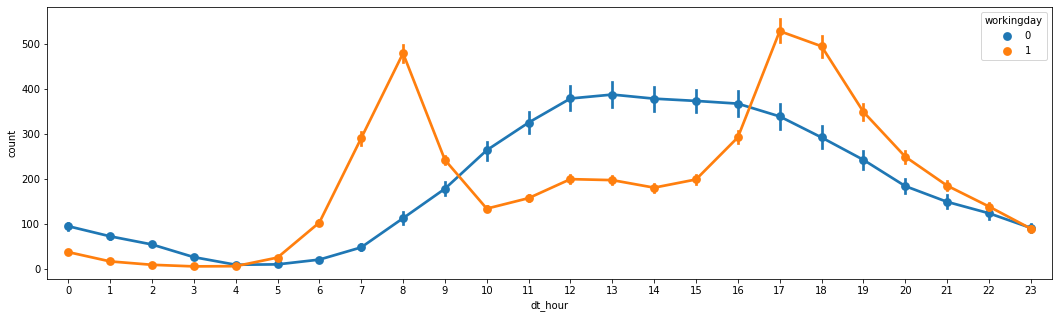

In [21]:
plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "dt_hour", y = "count", hue = "workingday")

In [22]:
data = [train, test]

for dataset in data:
    dataset["day"] = dataset["datetime"].dt.day_name()

train[["datetime", "day"]].head()

,datetime,day
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


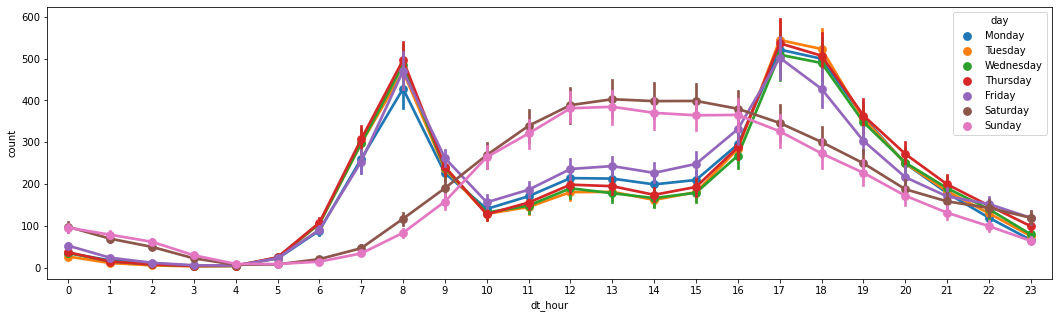

In [23]:
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "dt_hour", y = "count", hue = "day", hue_order = day)

In [24]:
data = [train, test]

for dataset in data:
    dataset[day[0].lower()] = dataset["day"] == day[0]
    dataset[day[1].lower()] = dataset["day"] == day[1]
    dataset[day[2].lower()] = dataset["day"] == day[2]
    dataset[day[3].lower()] = dataset["day"] == day[3]
    dataset[day[4].lower()] = dataset["day"] == day[4]
    dataset[day[5].lower()] = dataset["day"] == day[5]
    dataset[day[6].lower()] = dataset["day"] == day[6]

train[["day", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]].head()

,day,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,Saturday,False,False,False,False,False,True,False
1,Saturday,False,False,False,False,False,True,False
2,Saturday,False,False,False,False,False,True,False
3,Saturday,False,False,False,False,False,True,False
4,Saturday,False,False,False,False,False,True,False


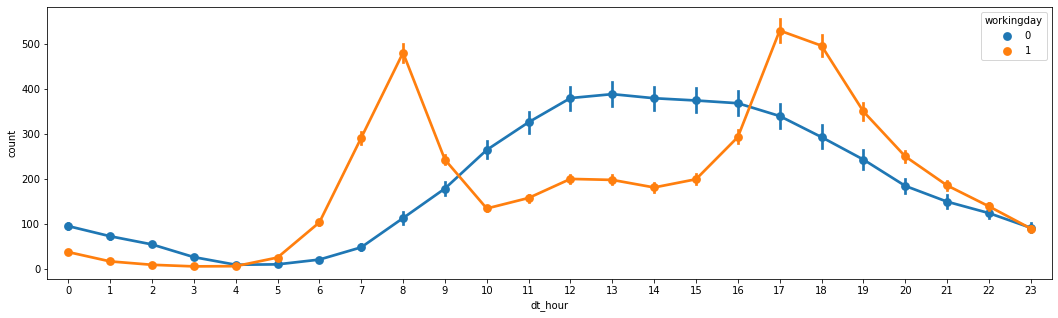

In [25]:
plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "dt_hour", y = "count", hue = "workingday")

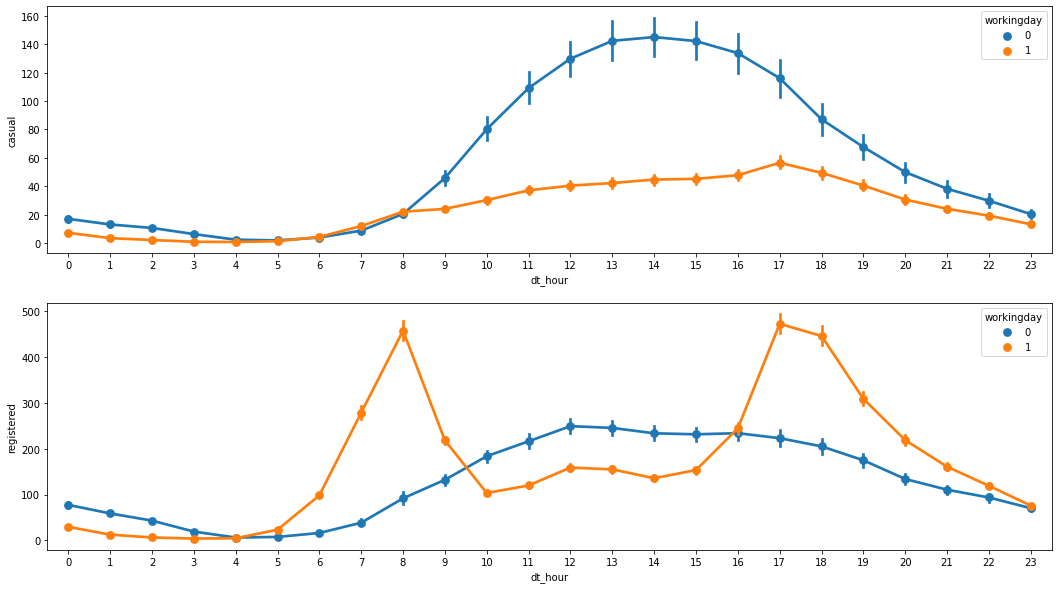

In [26]:
figure, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
figure.set_size_inches(18, 10)

sns.pointplot(data = train, x = "dt_hour", y = "casual", hue = "workingday", ax = ax1)
sns.pointplot(data = train, x = "dt_hour", y = "registered", hue = "workingday", ax = ax2)

In [27]:
data = [train, test]

for dataset in data:
    dataset["work_am"] = (dataset["workingday"] == 1) & (dataset["dt_hour"] >= 6) & (dataset["dt_hour"] <= 9)
    dataset["work_pm"] = (dataset["workingday"] == 1) & (dataset["dt_hour"] >= 16) & (dataset["dt_hour"] <= 19)
    dataset["not_work"] = (dataset["workingday"] == 0) & (dataset["dt_hour"] >= 10) & (dataset["dt_hour"] <= 17)

train[["work_am", "work_pm", "not_work"]].head()

,work_am,work_pm,not_work
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


#### 풍속 (windspeed)

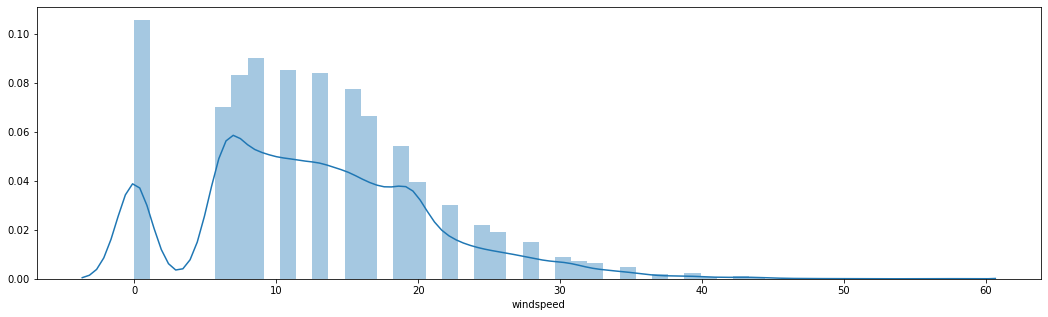

In [28]:
plt.figure(figsize = (18, 5))
sns.distplot(train["windspeed"])

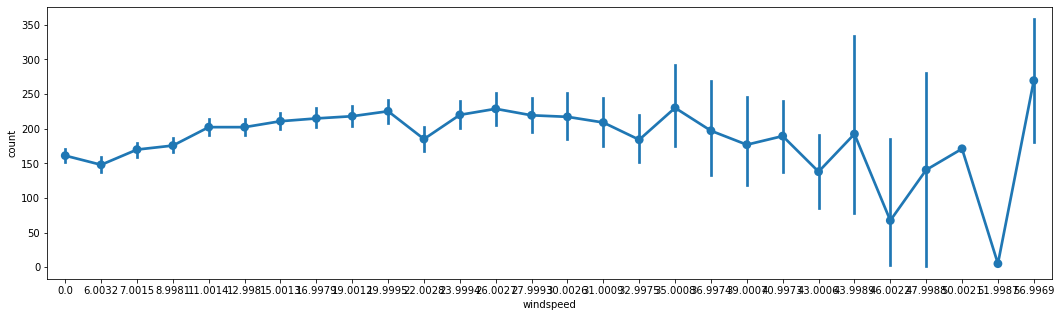

In [29]:
plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "windspeed", y = "count")

In [30]:
data = [train, test]

for dataset in data:
    dataset["windspeed_mod"] = dataset["windspeed"].round(4) - dataset["windspeed"].astype(int)

train["windspeed_mod"].value_counts()

0.0000    1313
0.9981    1120
0.0014    1057
0.9980    1042
0.0015    1034
0.0013     961
0.0032     872
0.9979     824
0.0012     676
0.9995     492
0.0028     372
0.9994     274
0.0027     235
0.9993     187
0.0026     111
0.0009      89
0.9975      80
0.0008      58
0.0007      27
0.9974      22
0.0006      12
0.9973      11
0.9989       8
0.0022       3
0.9969       2
0.9988       2
0.0021       1
0.9987       1
Name: windspeed_mod, dtype: int64

In [31]:
data = [train, test]

for dataset in data:
    dataset["windspeed_mod"] = dataset["windspeed_mod"].round().astype(int)

train["windspeed_mod"].value_counts()

0    6821
1    4065
Name: windspeed_mod, dtype: int64

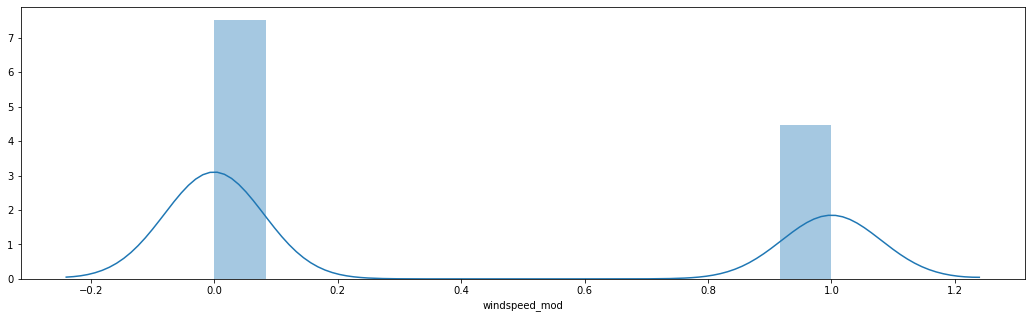

In [32]:
plt.figure(figsize = (18, 5))
sns.distplot(train["windspeed_mod"])

#### 온도 (temp) & 체감 온도 (atemp)

In [33]:
data = [train, test]

for dataset in data:
    dataset["temp_int"] = dataset["temp"].round().astype(int)
    dataset["atemp_int"] = dataset["atemp"].round().astype(int)

In [34]:
train[["temp", "temp_int", "atemp", "atemp_int"]].head()

,temp,temp_int,atemp,atemp_int
0,9.84,10,14.395,14
1,9.02,9,13.635,14
2,9.02,9,13.635,14
3,9.84,10,14.395,14
4,9.84,10,14.395,14


In [35]:
train[["temp", "temp_int", "atemp", "atemp_int"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       10886 non-null  float64
 1   temp_int   10886 non-null  int64  
 2   atemp      10886 non-null  float64
 3   atemp_int  10886 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 340.3 KB


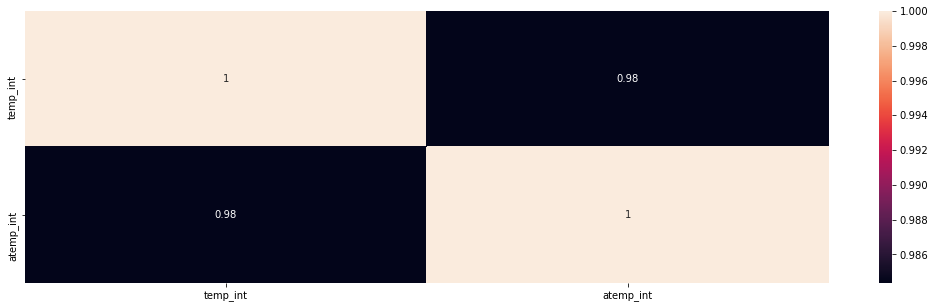

In [36]:
plt.figure(figsize = (18, 5))
sns.heatmap(data = train[["temp_int", "atemp_int"]].corr(), annot = True)

<Figure size 1296x360 with 0 Axes>

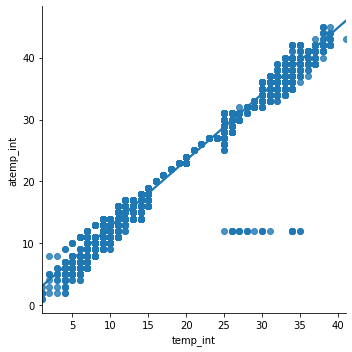

In [37]:
plt.figure(figsize = (18, 5))
sns.lmplot(data = train, x = "temp_int", y = "atemp_int")

In [38]:
row_index = train[(train["temp_int"] >= 20) & (train["temp_int"] <= 37.5) & (train["atemp_int"] >= 10) & (train["atemp_int"] <= 15)].index
train = train.drop(index = row_index)

<Figure size 1296x360 with 0 Axes>

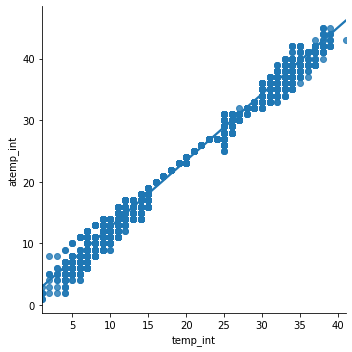

In [39]:
plt.figure(figsize = (18, 5))
sns.lmplot(data = train, x = "temp_int", y = "atemp_int")

In [40]:
train["temp_int"].unique()

array([10,  9,  8, 13, 16, 15, 17, 19, 18, 14, 12, 11,  7,  6,  5,  4,  3,
        2, 21, 23, 24, 25, 20, 22, 27, 26, 28, 29, 30, 31, 34, 35, 37, 33,
       32, 36, 38, 39,  1, 41])

In [41]:
train["atemp_int"].unique()

array([14, 13, 17, 20, 21, 23, 22, 11, 10,  8,  7,  5,  6,  9, 12, 16,  3,
        4, 15, 18, 25, 27, 30, 26, 31, 24, 19, 32, 33, 29, 35, 36, 37, 40,
       42, 41, 39, 34, 28, 38, 44,  2,  1, 43, 45])

In [42]:
data = [train, test]

for dataset in data:
    dataset["temp_diffs"] = dataset["temp_int"] - dataset["atemp_int"]

train[["temp_int", "atemp_int", "temp_diffs"]].head()

,temp_int,atemp_int,temp_diffs
0,10,14,-4
1,9,14,-5
2,9,14,-5
3,10,14,-4
4,10,14,-4


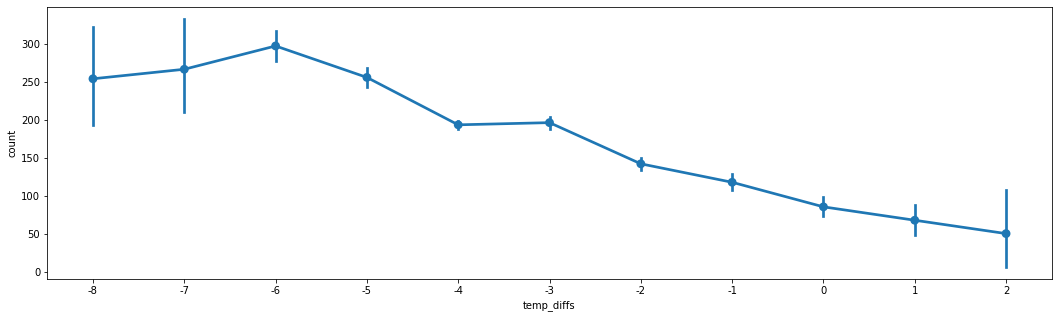

In [43]:
plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "temp_diffs", y = "count")

In [44]:
train["temp_diffs"].value_counts()

-4    5106
-3    2097
-2    1415
-5    1049
-1     509
-6     405
 0     219
 1      32
-7      21
-8       5
 2       4
Name: temp_diffs, dtype: int64

In [45]:
data = [train, test]

for dataset in data:
    dataset.loc[dataset["temp_diffs"] >= 0, "temp_diffs"] = 0
    dataset.loc[dataset["temp_diffs"] <= -6, "temp_diffs"] = -6

train["temp_diffs"].value_counts()

-4    5106
-3    2097
-2    1415
-5    1049
-1     509
-6     431
 0     255
Name: temp_diffs, dtype: int64

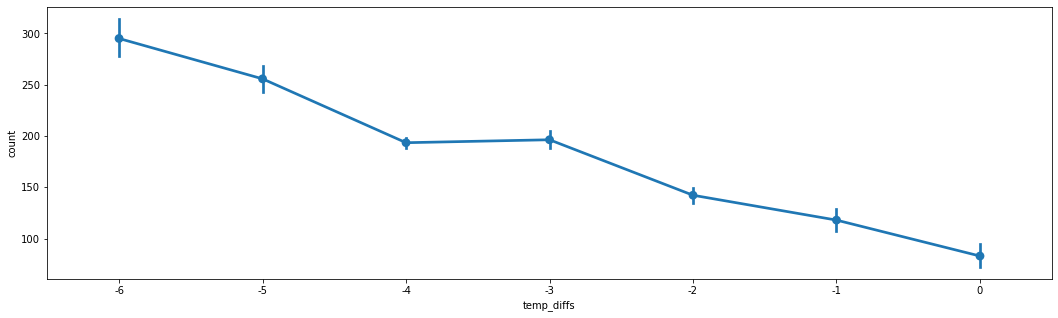

In [46]:
plt.figure(figsize = (18, 5))
sns.pointplot(data = train, x = "temp_diffs", y = "count")

In [47]:
def discomfort_index(temp, humidity):
    thi = (9/5) * temp - 0.55 * (1 - (humidity/100)) * ((9/5) * temp - 26) + 32
    return thi.round()

In [48]:
data = [train, test]

for dataset in data:
    dataset["discomfort"] = discomfort_index(dataset["temp_int"], dataset["humidity"])
    dataset["discomfort"] = dataset["discomfort"].astype(int)

train[["temp_int", "humidity", "discomfort"]].head()

,temp_int,humidity,discomfort
0,10,81,51
1,9,80,49
2,9,80,49
3,10,75,51
4,10,75,51


In [49]:
data = [train, test]

for dataset in data:
    dataset.loc[(dataset["discomfort"] >= 80), "thi"] = "very_high"
    dataset.loc[(dataset["discomfort"] >= 75) & (dataset["discomfort"] < 80), "thi"] = "high"
    dataset.loc[(dataset["discomfort"] >= 68) & (dataset["discomfort"] < 75), "thi"] = "medium"
    dataset.loc[(dataset["discomfort"] < 68), "thi"] = "low"

train[["discomfort", "thi"]].head()

,discomfort,thi
0,51,low
1,49,low
2,49,low
3,51,low
4,51,low


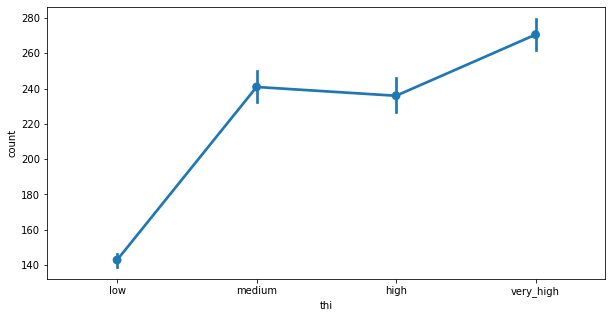

In [50]:
plt.figure(figsize = (10, 5))
sns.pointplot(data = train, x = "thi", y = "count")

In [51]:
data = [train, test]
thi = ["very_high", "high", "medium", "low"]

for dataset in data:
    dataset[thi[0]] = dataset["discomfort"] == thi[0]
    dataset[thi[1]] = dataset["discomfort"] == thi[1]
    dataset[thi[2]] = dataset["discomfort"] == thi[2]
    dataset[thi[3]] = dataset["discomfort"] == thi[3]

train[thi].head()

/Users/sangrok/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,very_high,high,medium,low
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


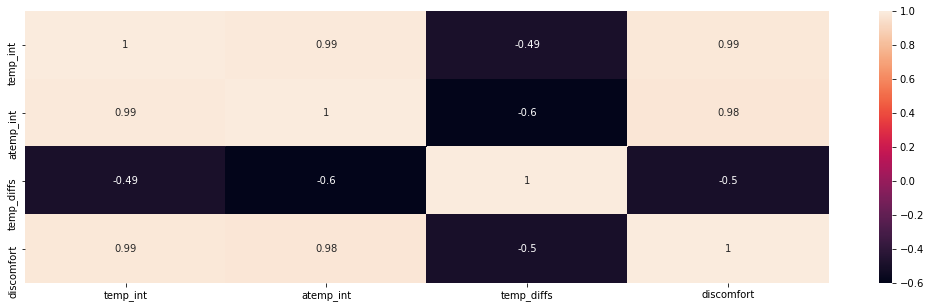

In [52]:
plt.figure(figsize = (18, 5))
sns.heatmap(data = train[["temp_int", "atemp_int", "temp_diffs", "discomfort"]].corr(), annot = True)

### RANDOM FOREST

In [53]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'dt_year', 'dt_month', 'dt_day', 'dt_hour', 'day', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'work_am',
       'work_pm', 'not_work', 'windspeed_mod', 'temp_int', 'atemp_int',
       'temp_diffs', 'discomfort', 'thi', 'very_high', 'high', 'medium',
       'low'],
      dtype='object')

In [54]:
data = [train, test]
category = ["season", "holiday", "workingday", "weather", "windspeed_mod"]

for dataset in data:
    for feature in category:
        dataset[feature] = dataset[feature].astype("category")

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10862 entries, 0 to 10885
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       10862 non-null  datetime64[ns]
 1   season         10862 non-null  category      
 2   holiday        10862 non-null  category      
 3   workingday     10862 non-null  category      
 4   weather        10862 non-null  category      
 5   temp           10862 non-null  float64       
 6   atemp          10862 non-null  float64       
 7   humidity       10862 non-null  int64         
 8   windspeed      10862 non-null  float64       
 9   casual         10862 non-null  int64         
 10  registered     10862 non-null  int64         
 11  count          10862 non-null  int64         
 12  dt_year        10862 non-null  int64         
 13  dt_month       10862 non-null  int64         
 14  dt_day         10862 non-null  int64         
 15  dt_hour        1086

In [55]:
feature = ["season", "holiday", "workingday", "weather", "humidity", "dt_year", "dt_hour", "monday", "friday", "saturday", "sunday", "work_am", "work_pm", "not_work", "windspeed_mod", "temp_int", "atemp_int", "very_high", "high", "medium", "low"]
label = ["casual", "registered"]

print(feature)

['season', 'holiday', 'workingday', 'weather', 'humidity', 'dt_year', 'dt_hour', 'monday', 'friday', 'saturday', 'sunday', 'work_am', 'work_pm', 'not_work', 'windspeed_mod', 'temp_int', 'atemp_int', 'very_high', 'high', 'medium', 'low']


In [56]:
x_train = train[feature]
y_train_casual = train[label[0]]
y_train_registered = train[label[1]]
x_test = test[feature]

In [57]:
x_train.head()

,season,holiday,workingday,weather,humidity,dt_year,dt_hour,monday,friday,saturday,...,work_am,work_pm,not_work,windspeed_mod,temp_int,atemp_int,very_high,high,medium,low
0,1,0,0,1,81,2011,0,False,False,True,...,False,False,False,0,10,14,False,False,False,False
1,1,0,0,1,80,2011,1,False,False,True,...,False,False,False,0,9,14,False,False,False,False
2,1,0,0,1,80,2011,2,False,False,True,...,False,False,False,0,9,14,False,False,False,False
3,1,0,0,1,75,2011,3,False,False,True,...,False,False,False,0,10,14,False,False,False,False
4,1,0,0,1,75,2011,4,False,False,True,...,False,False,False,0,10,14,False,False,False,False


In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model_casual = RandomForestRegressor(n_estimators = 100, random_state = 30)
model_registered = RandomForestRegressor(n_estimators = 100, random_state = 30)

In [60]:
model_casual.fit(x_train, y_train_casual)
model_registered.fit(x_train, y_train_registered)

RandomForestRegressor(random_state=30)

In [61]:
predict_casual = model_casual.predict(x_test)
predict_registered = model_registered.predict(x_test)

In [62]:
predict = predict_casual + predict_registered
predict[:10]

array([ 10.52 ,   5.84 ,   3.05 ,   3.305,   2.55 ,   5.32 ,  40.22 ,
       107.89 , 245.53 , 125.91 ])

In [63]:
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [64]:
submission["count"] = predict
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.520
1,2011-01-20 01:00:00,5.840
2,2011-01-20 02:00:00,3.050
3,2011-01-20 03:00:00,3.305
4,2011-01-20 04:00:00,2.550


In [65]:
submission.to_csv("bike_submission.csv", index = False)